In [16]:
%run import.ipynb

# Exploratory data analysis

In [17]:
data_train.head()
#data_test.head()
#data_sample.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


The **data_train** dataset contains informations about passengers aboard the Spaceship Titanic. Key features include **PassengerId** (unique identifier), **HomePlanet** (planet of origin), **CryoSleep** (boolean indicating if the passenger was in cryogenic sleep), **Cabin** (cabin details including deck, number, and side), **Destination** (final destination), **Age**, **VIP status** , and various amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck**. The **Name** column contains passenger names. The target variable **Transported** indicates whether a passenger was transported by the space-time anomaly. Initial exploration suggests a diverse range of passengers with varying amenities usage and VIP status.

In [18]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


The summary statistics of numerical features indicate that the dataset contains information on passengers with an average age of approximately 28.83 years old.

The amenities such as **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, and **VRDeck** show varying usage levels, with mean values ranging from around 224 to 458.

The standard deviations are relatively high, suggesting a wide dispersion in the usage of these amenities.

Additionally, the minimum values indicate that some passengers did not utilize these amenities at all, while the maximum values reflect the highest recorded usage levels.

The quartile values provide insight into the distribution of these features across the dataset.

In [19]:
data_train.describe(include=['O'])
#id cabin name

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


The summary statistics of categorical features indicate that the dataset includes information on 8693 unique passengers. The HomePlanet feature has three unique values, with 'Earth' being the most common, occurring 4602 times. The CryoSleep feature is binary, with the majority of passengers (5439) not in cryogenic sleep. The Cabin feature has a high cardinality, with 6560 unique values. The most frequent cabin designation is 'G/734/S', occurring 8 times. The Destination feature has three unique values, with 'TRAPPIST-1e' being the most common destination, occurring 5915 times. The VIP feature is binary, with the majority of passengers (8291) not being VIPs. The Name feature has 8473 unique values, with 'Gollux Reedall' being the most frequent name, occurring twice.

In [20]:
data_train.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

This provides insight into the distribution of data regarding individuals' home planets in the DataFrame.

In [21]:
data_train['Transported'] = data_train['Transported'].map({True: 1, False: 0}).astype(int)
data_train[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)
#moyenne de non-transported par planetes de départ

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


The analysis shows that passengers from Europa have the highest proportion of being transported (approximately 65.88%), followed by passengers from Mars (approximately 52.30%), and Earth (approximately 42.39%). This suggests a potential correlation between the planet of origin and the likelihood of being transported by the space-time anomaly.

In [23]:
print(data_train.isnull().sum())
#print()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [24]:
print(data_train.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    0
8690    0
8691    0
8692    0
Length: 8693, dtype: int64


In [25]:
# Checking the number of missing values in each column
missing_values = data_train.isnull().sum()

# Calculating the percentage of missing values for each column
missing_percentage = (data_train.isnull().sum() / len(data_train)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})

# Filtering out columns with no missing values
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data

,Missing Values,Percentage (%)
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


The code calculates the number and percentage of missing values for each column in the data_train dataset. The table is sorted in descending order based on the percentage of missing values.

The analysis reveals that the feature 'CryoSleep' has the highest percentage of missing values (approximately 2.50%), followed by 'ShoppingMall' (approximately 2.39%) and 'VIP' (approximately 2.34%). Other features such as 'HomePlanet', 'Name', 'Cabin', and 'VRDeck' also exhibit a non-negligible percentage of missing values.

These results highlight the need for appropriate handling of missing data during data preprocessing to ensure the reliability of subsequent analyses.

Thus, we can replace the missing values by the mean of the colums if the data is numerical, and by the most frequence value if it is not.

In [1]:
data_num = data_train[["PassengerId", "Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
data_str = data_train[["HomePlanet", "Cabin", "Destination", "Name"]]
data_bool = data_train[["CryoSleep", "VIP", "Transported"]] #pas de missing values dans transported

#remplacement valeurs manquante de data_num
imputer = SimpleImputer(strategy="mean")
imputer.fit(data_num)
X = imputer.transform(data_num)
data_num_tr = pd.DataFrame(X, columns = data_num.columns)

#remplacement valeurs manquante de data_str
imputer_str = SimpleImputer(strategy="most_frequent")
imputer_str.fit(data_str)
Y = imputer_str.transform(data_str)
data_str_tr = pd.DataFrame(Y, columns=data_str.columns)

#remplacement valeurs manquante de data_str
imputer_bool = SimpleImputer(strategy="most_frequent")
imputer_bool.fit(data_bool)
Z = imputer_bool.transform(data_bool)
data_bool_tr = pd.DataFrame(Z, columns=data_bool.columns)

data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)

print(data_num_tr)
print(data_str_tr)
print(data_bool_tr)
print(data_train_tr)


NameError: name 'data_train' is not defined

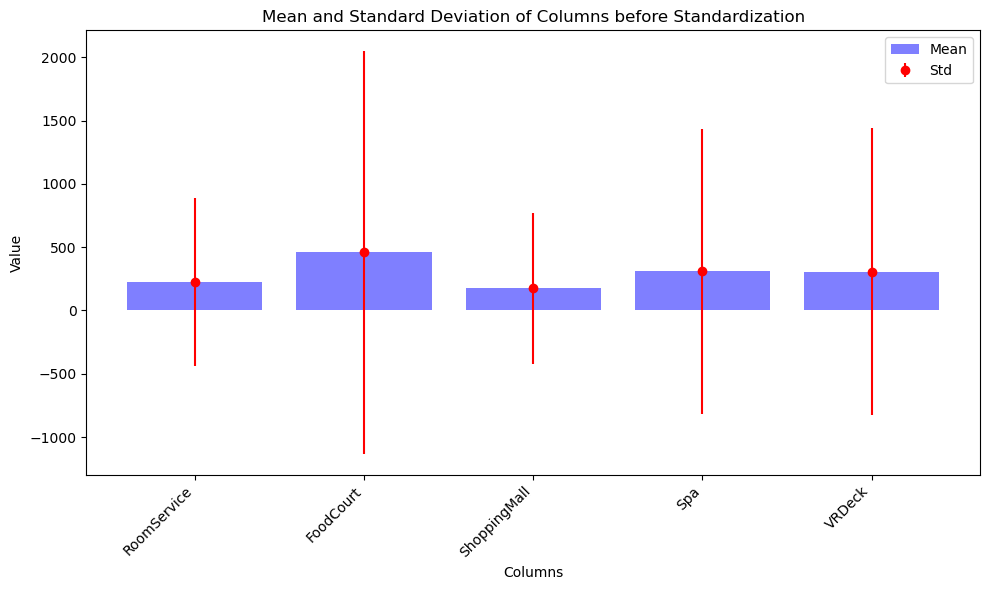

In [27]:
stand = data_num_tr[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]

means = stand.mean()
stds = stand.std()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(means.index, means, color='blue', alpha=0.5, label='Mean')

ax.errorbar(means.index, means, yerr=stds, fmt='o', color='red', label='Std')

ax.set_title('Mean and Standard Deviation of Columns before Standardization')
ax.set_xlabel('Columns')
ax.set_ylabel('Value')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Il faut grave standardiser la c'est urgent

In [30]:
scaler = StandardScaler()
data_num_stand = scaler.fit_transform(stand)
data_num_stand = pd.DataFrame(data_num_stand, columns=stand.columns)

print(data_num_stand)

a = data_num_tr[["PassengerId", "Age"]]
data_num_tr = pd.concat([a, data_num_stand], axis=1)

print(data_num_tr)

data_train_tr = pd.concat([data_num_tr, data_str_tr, data_bool_tr], axis=1)


      RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0       -0.340590  -0.287314     -0.290817 -0.276663 -0.269023
1       -0.175364  -0.281669     -0.248968  0.211505 -0.230194
2       -0.275409   1.955616     -0.290817  5.694289 -0.225782
3       -0.340590   0.517406      0.330225  2.683471 -0.098708
4        0.118709  -0.243409     -0.038048  0.225732 -0.267258
...           ...        ...           ...       ...       ...
8688    -0.340590   3.989682     -0.290817  1.184286 -0.203720
8689    -0.340590  -0.287314     -0.290817 -0.276663 -0.269023
8690    -0.340590  -0.287314      2.842851 -0.275774 -0.269023
8691    -0.340590   0.370637     -0.290817  0.037223  2.585740
8692    -0.149594   2.653082     -0.290817 -0.276663 -0.258433

[8693 rows x 5 columns]
      PassengerId   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
0           101.0  39.0    -0.340590  -0.287314     -0.290817 -0.276663   
1           201.0  24.0    -0.175364  -0.281669     -0.248968  0.2115

Data Splitting:

The code initially splits the dataset data_train into three separate datasets based on the type of features:
data_num: Contains numerical features such as PassengerId, Age, and various amenities.
data_str: Contains categorical string features like HomePlanet, Cabin, and Name.
data_bool: Contains boolean features including CryoSleep, VIP, and Transported.
Missing Value Imputation:

Missing values in each subset are imputed separately using different strategies:
For data_num, missing values are replaced with the mean value of each column using SimpleImputer with the strategy set to "mean".
For data_str, missing values are replaced with the most frequent value (mode) of each column using SimpleImputer with the strategy set to "most_frequent".
Similarly, for data_bool, missing values are replaced with the most frequent value.
Concatenation:

After imputation, the transformed subsets are concatenated back together along the columns to form the new DataFrame data_train_tr.
Result:

The resulting DataFrame data_train_tr contains all the original columns with missing values replaced. Now, the dataset is ready for further analysis or modeling without any missing values.

In [31]:
print("data_num_tr:\n")
print(data_num_tr.isnull().sum())
print("--------")
print("data_str_tr:\n")
print(data_str_tr.isnull().sum())
print("--------")
print("data_bool_tr:\n")
print(data_bool_tr.isnull().sum())
print("--------")
print("data_train_tr:\n")
print(data_train_tr.isnull().sum())

data_num_tr:

PassengerId     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64
--------
data_str_tr:

HomePlanet     0
Cabin          0
Destination    0
Name           0
dtype: int64
--------
data_bool_tr:

CryoSleep      0
VIP            0
Transported    0
dtype: int64
--------
data_train_tr:

PassengerId     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
HomePlanet      0
Cabin           0
Destination     0
Name            0
CryoSleep       0
VIP             0
Transported     0
dtype: int64


After imputation, the code checks for missing values in each subset: For data_num, there are no missing values in any of the columns.
Similarly, for data_str and data_bool, all columns have been successfully imputed, and there are no missing values.
Overall Dataset Check:

The code then checks for missing values in the concatenated dataset data_train_tr. As expected, there are no missing values in any column of the combined dataset.

These results confirm that missing values have been successfully handled through imputation, and the dataset is now complete and ready for further analysis or modeling.

In [32]:
print('Transported' in data_train_tr.columns)

True



The printed statement confirms that the column "Transported" is indeed present in the DataFrame data_train_tr. The boolean value True indicates that the column exists within the DataFrame's columns. This verification is important to ensure that the transformation and concatenation processes did not inadvertently remove or alter the desired columns.

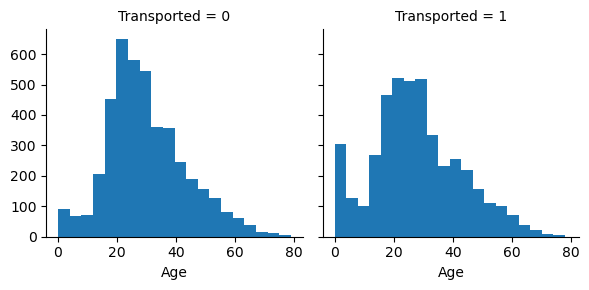

In [33]:
g = sns.FacetGrid(data_train_tr, col='Transported')
g.map(plt.hist, 'Age', bins=20)

*   **Age Distribution and Transported Status :** The concentration of non-transported individuals within the 18 to 40 age range suggests that this demographic may have been more actively involved in the event leading to transportation. Conversely, the broader age distribution among transported individuals, including a peak of newborns, indicates a wider demographic affected by the transportation event ;

*   **Impact of Age on Transported Status :** The presence of newborns among transported individuals may suggest a vulnerability to the transportation phenomenon across all age groups. It could imply that factors other than age alone influence an individual's likelihood of being transported ;

*   **Potential Factors Influencing Transportation :** Further analysis could explore potential factors contributing to transportation, such as occupation, socioeconomic status, or health conditions. Understanding these factors may provide insights into why certain age groups are more affected than others ;

*   **Effectiveness of Rescue Efforts :** The age distribution of transported individuals may also reflect the success of rescue efforts. For example, the presence of newborns could indicate prioritization in rescue operations or differential susceptibility to the transportation phenomenon ;

*   **Long-Term Implications :** The implications of transportation on different age groups, such as psychological effects, societal adaptation, and resettlement challenges, could be explored. Understanding how different age groups cope with and adapt to transportation could inform future rescue and support efforts.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.In

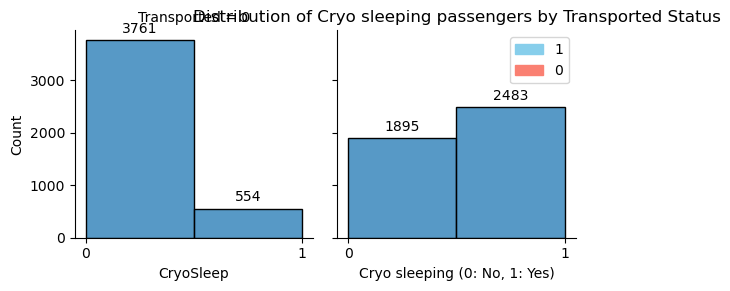

In [34]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train_tr, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'CryoSleep', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('Cryo sleeping (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of Cryo sleeping passengers by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.In

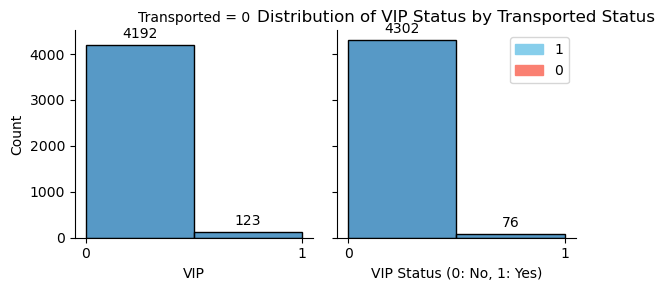

In [35]:
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)
#g = sns.FacetGrid(data_train_tr, col='Transported')
#g.map(plt.hist, 'VIP', bins=20)


# Mapping boolean values to integers (1 for True, 0 for False)
#data_train_tr['VIP'] = data_train_tr['VIP'].map({True: 1, False: 0}).astype(int)

# Defining color palette for 'Transported' values
transported_colors = {1: 'skyblue', 0: 'salmon'}

# Creating the FacetGrid
g = sns.FacetGrid(data_train_tr, col='Transported')

# Plotting the stacked bar chart for VIP status
g.map(sns.histplot, 'VIP', bins=2, multiple="stack", palette=transported_colors)

# Adding labels and title
plt.xlabel('VIP Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Distribution of VIP Status by Transported Status')

# Adding legend
handles = [plt.Rectangle((0,0),1,1, color=transported_colors[label]) for label in transported_colors]
plt.legend(handles, transported_colors.keys(), loc='upper right')

# Setting x-axis ticks to be binary values
plt.xticks(ticks=[0, 1])

# Adding numeric values on top of each bar
for ax in g.axes.flat:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

# Showing the plot
plt.show()

#Améliorer pour avoir la distinction de couleurs

These graphs represent the distribution of VIP status among transported and non-transported passengers. Here are the interpretations:

For non-transported passengers (Transported = 0):

There are 4192 passengers who are not VIP and 123 VIP passengers.
The histogram shows that the majority of non-transported passengers are not VIP, with a significantly higher number of regular passengers compared to VIP ones.
The bar corresponding to VIP passengers is much smaller in comparison, suggesting that there are relatively fewer VIP passengers among those who are not transported.

For transported passengers (Transported = 1) :
There are 4302 passengers who are not VIP and 76 VIP passengers.
Similar to non-transported passengers, the majority of transported passengers are not VIP, with a much larger bar for regular passengers.
However, the difference between the number of regular passengers and VIP passengers is even more pronounced among transported passengers, suggesting that VIP passengers are less likely to be transported compared to regular passengers.
In summary, these graphs indicate a trend where regular passengers are less likely to be transported, suggesting that VIP status may be a determining factor in passenger selection for transportation.

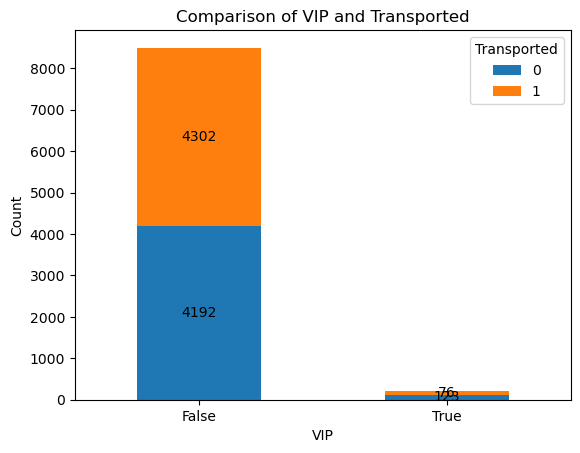

In [36]:
comparison_df = data_train_tr.groupby(['VIP', 'Transported']).size().unstack()

# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

plt.xlabel('VIP')
plt.ylabel('Count')
plt.title('Comparison of VIP and Transported')
plt.xticks(rotation=0)
plt.show()

# à supprimer ?

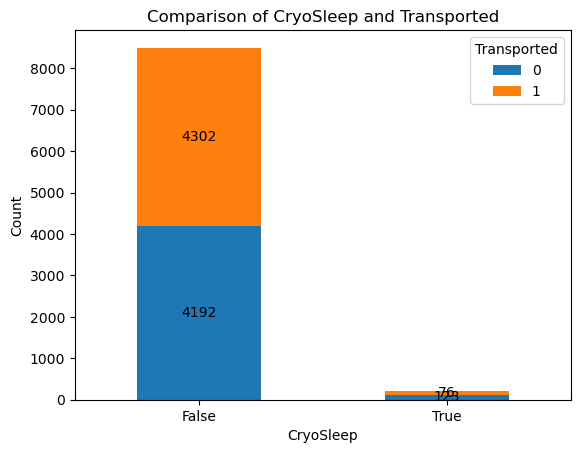

In [37]:
# Créer le graphique à barres empilées
ax = comparison_df.plot(kind='bar', stacked=True)

# Ajouter les valeurs numériques au-dessus de chaque barre
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

# Autres paramètres du graphique
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.title('Comparison of CryoSleep and Transported')
plt.xticks(rotation=0)
plt.show()


# à supprimer ?

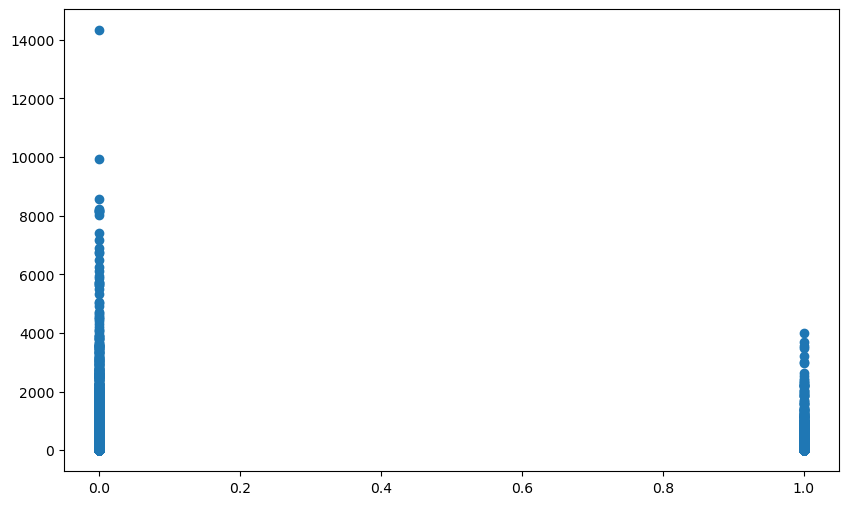

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data_train['Transported'], data_train['RoomService'])
#plt.title('Heart Disease by Age')
plt.show()

In [39]:
#plt.figure(figsize=(10, 6))
#plt.scatter(data_train['Transported'], data_train['PassengerId'].astype(str).str.slice(0, 4))
#plt.show()


In [40]:

# Créer une nouvelle colonne pour stocker les noms des colonnes avec des valeurs manquantes
missing_data['Columns with Missing Values'] = data_train.apply(lambda row: row.index[row.isnull()].tolist(), axis=1)

# Filtrer les lignes avec des valeurs manquantes
missing_data = missing_data[missing_data['Missing Values'] > 1]

# Afficher le DataFrame résultant
print(missing_data)



              Missing Values  Percentage (%) Columns with Missing Values
CryoSleep                217        2.496261                         NaN
ShoppingMall             208        2.392730                         NaN
VIP                      203        2.335212                         NaN
HomePlanet               201        2.312205                         NaN
Name                     200        2.300702                         NaN
Cabin                    199        2.289198                         NaN
VRDeck                   188        2.162660                         NaN
FoodCourt                183        2.105142                         NaN
Spa                      183        2.105142                         NaN
Destination              182        2.093639                         NaN
RoomService              181        2.082135                         NaN
Age                      179        2.059128                         NaN


On observe que le maximum de valeurs manquantes par ligne vaut 2. Nous n'avons donc pas besoin de supprimer de ligne du dataset.

In [41]:
columns = {"HomePlanet", "Destination", "Name"}

#def replace